In [37]:
import tensorflow as tf
import numpy as np
import time


In [38]:
x = []
for i in range(10):
    rand_num = np.random.rand()*100
    x.append(rand_num)
x = np.array(x,dtype=float)
print(x)

y = []
for i in range(10):
    rand_num = np.random.rand()*100
    y.append(rand_num)
y = np.array(y,dtype=float)
print(y)

w = []
for i in range(10):
    q = (x[i],y[i])
    w.append(q) 

w = np.array(w,dtype=float)
print(w)

z = []
for i in range(10):
    res = 5*x[i] - 3*y[i] +7
    z.append(res)
z = np.array(z,dtype=float)
print(z)

[13.46467242 31.75468371 95.89485549 20.74618985 98.33655263 26.19769029
 17.55811298 10.04782521 28.45663618  4.65369894]
[54.02378493 75.19720036 99.27035394 61.85050215  0.53635138 63.92840019
 43.26570829 77.80395267 37.14695457 71.5007527 ]
[[13.46467242 54.02378493]
 [31.75468371 75.19720036]
 [95.89485549 99.27035394]
 [20.74618985 61.85050215]
 [98.33655263  0.53635138]
 [26.19769029 63.92840019]
 [17.55811298 43.26570829]
 [10.04782521 77.80395267]
 [28.45663618 37.14695457]
 [ 4.65369894 71.5007527 ]]
[ -87.74799269  -59.81818254  188.66321564  -74.82055722  497.07370904
  -53.79674916  -35.00655996 -176.17273194   37.84231717 -184.23376341]


In [39]:
model = tf.keras.Sequential(
    tf.keras.layers.Dense(units=1, input_shape=[2])
)

model.compile(
        loss='mean_squared_error',
        metrics='accuracy',
        optimizer=tf.keras.optimizers.Adam(0.1)
    )

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [40]:
t = time.time()
hist = model.fit(w, z, epochs=1000, verbose=0)
print (str.format("Training took: {:0.2f} Sec", time.time() - t))

Training took: 13.14 Sec


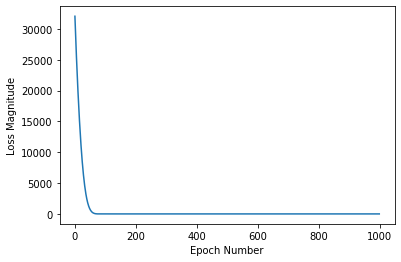

In [41]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(hist.history['loss']);

dict_keys(['loss', 'accuracy'])


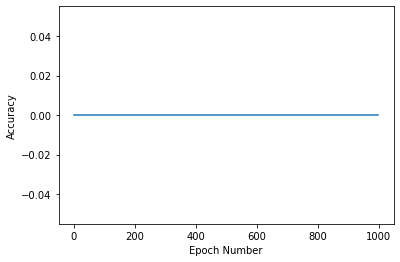

In [42]:
plt.xlabel('Epoch Number')
plt.ylabel("Accuracy")
plt.plot(hist.history['accuracy']);
print(hist.history.keys())

In [43]:
model.get_weights()

[array([[ 5.0019784],
        [-2.9960697]], dtype=float32),
 array([6.66318], dtype=float32)]

In [44]:
z = 5.0019784*x - 2.9960697*y + 6.66318

In [45]:
model.save('x,y_to_z.h5')

In [46]:
x = []
for i in range(3):
    rand_num = np.random.rand()*100
    x.append(rand_num)
x = np.array(x,dtype=float)
print(x)

y = []
for i in range(3):
    rand_num = np.random.rand()*100
    y.append(rand_num)
y = np.array(y,dtype=float)
print(y)

w = []
for i in range(3):
    q = (x[i],y[i])
    w.append(q) 

w = np.array(w,dtype=float)
print(w)

z = []
for i in range(3):
    res = 5*x[i] - 3*y[i] +7
    z.append(res)
z = np.array(z,dtype=float)
print(z)

model.predict(w)

[30.0444597   3.82334854 30.25006022]
[68.46848186 55.43880368 78.72362633]
[[30.0444597  68.46848186]
 [ 3.82334854 55.43880368]
 [30.25006022 78.72362633]]
[ -48.18314708 -140.19966837  -77.92057789]


array([[ -48.191433],
       [-140.31104 ],
       [ -77.88814 ]], dtype=float32)